In [1]:
import numpy as np
import pandas as pd

## Questions

1. What's your method of creating generalized functions? I have two ways in mind. (1) Create body of func, then create func name or (2) Create func name along with/before body.

# 2.1

- The following are temperature measurements z${_t}$ made every minute on a chemical reactor:
    1. Plot the time series.
    2. Plot $𝑧_{𝑡+1}$ versus $𝑧_𝑡$.
    3. Plot $𝑧_{𝑡+2}$ versus $𝑧_𝑡$.
    4. After inspecting the graphs, do you think that the series is autocorrelated?

## Data 

In [140]:
time_series_data = [200, 202, 208, 204, 204, 207, 207, 204, 202, 199, 201, 198, 200, 
        202, 203, 205, 207, 211, 204, 206, 203, 203, 201, 198, 200, 206, 
        207, 206, 200, 203, 203, 200, 200, 195, 202, 204, 207, 206, 200]


# print("time_series_data : ", time_series_data)
ts_data = pd.DataFrame(time_series_data)
ts_data
# pre_plot = pd.DataFrame({
#     'temperature measurements' : time_series_data
#     })

# print("pre_plot : ", pre_plot)

,0
0,200
1,202
2,208
3,204
4,204
5,207
6,207
7,204
8,202
9,199


## Q1 Plots w/ mini analysis

1. Histogram : Temp to occour the most is 204 and the least is a tie between 4 of them.
2. Line : Over the course of 39 temps, $ \exists $ a main peak between 15 - 20 w/ 3 other minor peaks. Starting temp is same/similar to ending temp.
3. Density : "Generate Kernel Density Estimate plot using Gaussian kernels." So, we are estimating this distribution's **probability density function** using **kernel density estimate**
4. KDE : same as (3) Density

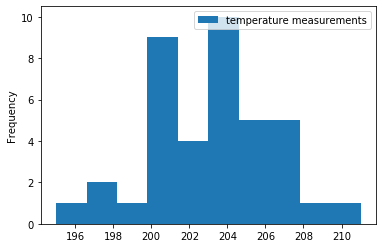

In [5]:
plot_histogram = pre_plot.plot.hist()

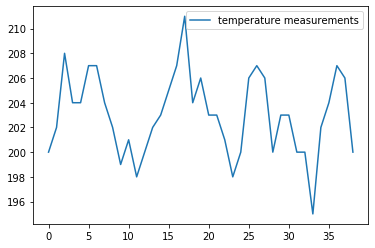

In [6]:
plot_line = pre_plot.plot.line()

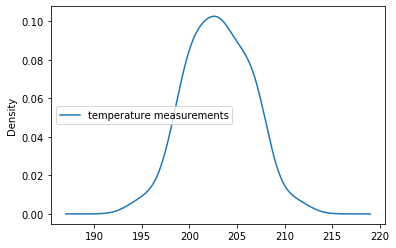

In [7]:
plot_density = pre_plot.plot.density()

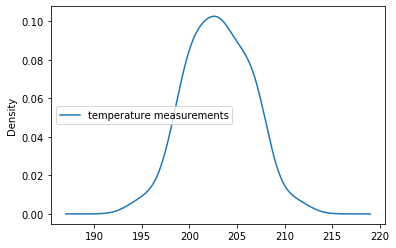

In [8]:
plot_kde = pre_plot.plot.kde()

---
 
## Q2 & Q3 Plots w/ mini analysis
1. W/ each plot, $ \nexists $ a shift which is noticeable unless there's a significant difference between t & k of z$ {_t}{_+}{_k} $
2. [ ] Basic stats sa : mean, median, range, etc will remain the same bc we're only increasing by a factor of k? 

In [23]:
## DATA PREP

t_plus_one_arr = []
t_plus_two_arr = []

for t in range(0, len(data)): 
    print("data[t] : ", t, data[t], data[t + 1], data[t + 2])
    # t_plus_one = data[t] + 1
    t_plus_one = data[t - 1]
    t_plus_one_arr.append(t_plus_one)
    
    # t_plus_two = data[t] + 10
    t_plus_two = data[t - 2]
    t_plus_two_arr.append(t_plus_two)

# print("\noriginal data : ", data)
# print("\nt_plus_one_arr : ", t_plus_one_arr)
# print("\nt_plus_two_arr : ", t_plus_two_arr)


new_pre_plot = pd.DataFrame({
    'temperature measurements' : data,
    'temperature measurements + 1' : t_plus_one_arr,
    'temperature measurements + 2' : t_plus_two_arr
    })

# print("new_pre_plot : ", new_pre_plot)

t_m = new_pre_plot['temperature measurements']
t_m_1 = new_pre_plot['temperature measurements + 1']
t_m_2 = new_pre_plot['temperature measurements + 2']

data[t] :  0 200 202 208
data[t] :  1 202 208 204
data[t] :  2 208 204 204
data[t] :  3 204 204 207
data[t] :  4 204 207 207
data[t] :  5 207 207 204
data[t] :  6 207 204 202
data[t] :  7 204 202 199
data[t] :  8 202 199 201
data[t] :  9 199 201 198
data[t] :  10 201 198 200
data[t] :  11 198 200 202
data[t] :  12 200 202 203
data[t] :  13 202 203 205
data[t] :  14 203 205 207
data[t] :  15 205 207 211
data[t] :  16 207 211 204
data[t] :  17 211 204 206
data[t] :  18 204 206 203
data[t] :  19 206 203 203
data[t] :  20 203 203 201
data[t] :  21 203 201 198
data[t] :  22 201 198 200
data[t] :  23 198 200 206
data[t] :  24 200 206 207
data[t] :  25 206 207 206
data[t] :  26 207 206 200
data[t] :  27 206 200 203
data[t] :  28 200 203 203
data[t] :  29 203 203 200
data[t] :  30 203 200 200
data[t] :  31 200 200 195
data[t] :  32 200 195 202
data[t] :  33 195 202 204
data[t] :  34 202 204 207
data[t] :  35 204 207 206
data[t] :  36 207 206 200


IndexError: list index out of range

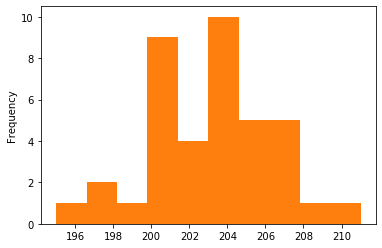

In [21]:
org_histogram = t_m.plot.hist()
p1_histogram = t_m_1.plot.hist()

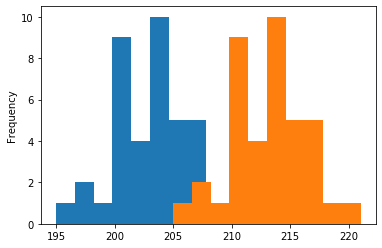

In [11]:
org_histogram = t_m.plot.hist()
p2_histogram = t_m_2.plot.hist()

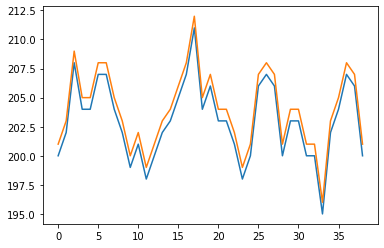

In [12]:
plot_line = t_m.plot.line()
plot_line = t_m_1.plot.line()

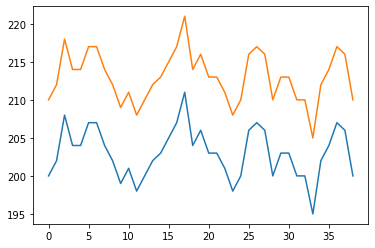

In [13]:
plot_line = t_m.plot.line()
plot_line = t_m_2.plot.line()

In [ ]:
plot_density = t_m.plot.density()
plot_density = t_m_1.plot.density()

In [ ]:
plot_density = t_m.plot.density()
plot_density = t_m_2.plot.density()

---

## Correcting plots

In [168]:
def plot_ts_with_pandas(ts_data):
    """
    ts_data -- pd DataFrame
    return -- plots ((1) z_t, (2) z_t vs z_t+1, (3) z_t vs z_t+2)
    """
    # print(z)
    
    z = ts_data
    plot_ts = z.plot()
    
    
    """
    z_t vs z_t+1
    """
    z1 = ts_data.shift(-1)
    z_vs_z1 = pd.concat([z, z1], axis = 1)
    z_vs_z1.columns = ["z", "z1"]
    plot_z_vs_z1 = z_vs_z1.plot()
    
    """
    z_t vs z_t+2
    """
    z2 = ts_data.shift(-2)
    z_vs_z2 = pd.concat([z, z2], axis = 1)
    z_vs_z2.columns = ["z", "z2"]
    plot_z_vs_z2 = z_vs_z2

    """
    All lags
    """
    
    # z_t_with_lag_1 = pd.concat([z, lag_k_1, lag_k_2], axis = 1)
    # z_t_with_lag.columns = ["z[t]", "z[t + 1]", "z[t + 2]"]
    # # print(z_t_with_lag)
    # plot_ts_lag = z_t_with_lag.plot()
    return plot_z_vs_z2

In [169]:
# plot_ts(time_series_data)

,z,z2
0,200,208.0
1,202,204.0
2,208,204.0
3,204,207.0
4,204,207.0
5,207,204.0
6,207,202.0
7,204,199.0
8,202,201.0
9,199,198.0


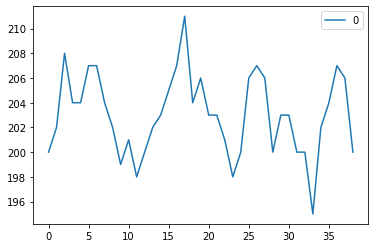

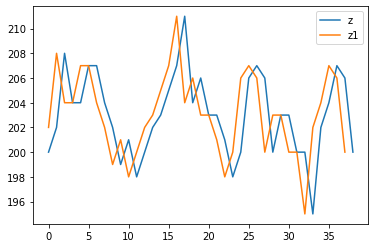

In [170]:
plot_ts_with_pandas(ts_data)

---

# Self-Discovery

1. Gathering of basics stats - total, mean, median, mode, range, and standard deviation

In [ ]:
def get_temp_stats(total, mean, median, mode, interval, sd) :

    temp_stats = []
    temp_dict = {}
    
    temp_stats.append(total)
    temp_stats.append(mean)
    temp_stats.append(median)
    temp_stats.append(mode)
    temp_stats.append(interval)
    temp_stats.append(sd)
    
    temp_names = ["total", "mean", "median", "mode", "interval", "sd"]
    # print("temp_stats : ", temp_stats)
    

# map temp_names to their value, respectively
    for key in temp_names :
        # print("key : ", key)
        for value in temp_stats :
            # print("value : ", value)
            temp_dict[key] = value
            temp_stats.remove(value)
            
#            break statement in Python terminates the current loop and resumes execution at the next statement which means to 
#                populate, then break to go to next key : value pair
            break
    return temp_dict

In [ ]:
t_m = pre_plot['temperature measurements']

temp_total = t_m.sum()
# print("temp_total : ", temp_total, "\n")

temp_mean = t_m.mean()
# print("temp_mean : ", temp_mean)

temp_median = t_m.median()

temp_max = t_m.max()
temp_min = t_m.min()
temp_range = temp_max - temp_min

temp_sd = t_m.std()

In [ ]:
get_temp_stats(temp_total, temp_mean, temp_median, temp_max, temp_range, temp_sd)